In [32]:
# Example of recursive linear regression

In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
# Parameters of the problem
R          = np.array([[1],[2]]) # Model to find back: y = s0 + s1 * x, this is the expected solution
sigmaY     = 0.1          # standard deviation of the noise applied to the observed values
N          = 100          # Number of samples
seedinit   = 1            # Initialization value for random generation
Pinit      = 10000 * np.eye(2)

In [35]:
# Initializations for the ordinary and recursive least squares algorithms

# Initializing the generator the control the reproducibility of the test
np.random.seed(seedinit)
# Generating the input values
X = np.arange(0,1,1.0/N,dtype=float).reshape(N, 1)
# Building the matrix: A x = y
A = np.concatenate((np.ones((N,1),dtype=float), X), axis=1)
# Generating observed values
Y = np.matmul(A, R) + sigmaY * np.random.randn(N,1)

In [36]:
# Computation of the batch solution
S = np.matmul(np.linalg.inv(np.matmul(np.transpose(A), A)), np.matmul(np.transpose(A),Y))
# Computing an estimate based on the computed model
Z = np.matmul(A, S)

In [42]:
# Recursive least squares (general case: valid for any number of unknown parameters)

# The initial value of Sri is taken as [0,0]
Sri = np.matrix([[0.0],[0.0]])
# Initializing the covariance matrix
P = np.matrix(Pinit)
Sr = np.zeros((2,N), dtype=float)
Zr = np.zeros((N,1), dtype=float)
H = np.matrix([[1.0, 0.0]])
for i in range(0,N):
    H[0,1] = X[i,0]
    K = np.matmul(np.matmul(P, np.transpose(H)), np.linalg.inv(np.matmul(H, np.matmul(P, np.transpose(H))) + sigmaY))
    P = np.matmul(np.eye(2, dtype=float) - np.matmul(K, H), P)
    Zr[i,0] = np.matmul(H, Sri)
    Sri = Sri + K * (Y[i,0] - Zr[i,0])
    Sr[0:2,i] = Sri[:,0].reshape((2,))

In [43]:
# Recursive least squares (specifc case: "unfolded" computations for 2 parameters)

# The initial value of Sris is taken as [0,0]
Sris = np.matrix([[0.0],[0.0]])
# Initializing the covariance matrix
Ps = np.matrix(Pinit)
Srs = np.zeros((2,N), dtype=float)
Zrs = np.zeros((N,1), dtype=float)
for i in range(0,N):
    Pi = np.copy(Ps)
    Ks = np.matrix([[Pi[0,0] + Pi[0,1] * X[i,0]],[Pi[1,0] + Pi[1,1] * X[i,0]]]) \
       / (Pi[0,0] + (Pi[0,1] + Pi[1,0]) * X[i,0] + Pi[1,1] * X[i,0]**2 + sigmaY)
    Ps[0,0] = (1.0 - Ks[0,0]) * Pi[0,0] - Ks[0,0] * X[i,0] * Pi[1,0]
    Ps[0,1] = (1.0 - Ks[0,0]) * Pi[0,1] - Ks[0,0] * X[i,0] * Pi[1,1]
    Ps[1,0] = -Ks[1,0] * Pi[0,0] + (1.0 - Ks[1,0] * X[i,0]) * Pi[1,0]
    Ps[1,1] = -Ks[1,0] * Pi[0,1] + (1.0 - Ks[1,0] * X[i,0]) * Pi[1,1]
    Zrs[i,0] = Sris[0,0] + Sris[1,0] * X[i,0]
    Sris[0,0] = Sris[0,0] + Ks[0,0] * (Y[i,0] - Zrs[i,0])
    Sris[1,0] = Sris[1,0] + Ks[1,0] * (Y[i,0] - Zrs[i,0])
    Srs[0:2,i] = Sris[:,0].reshape((2,))

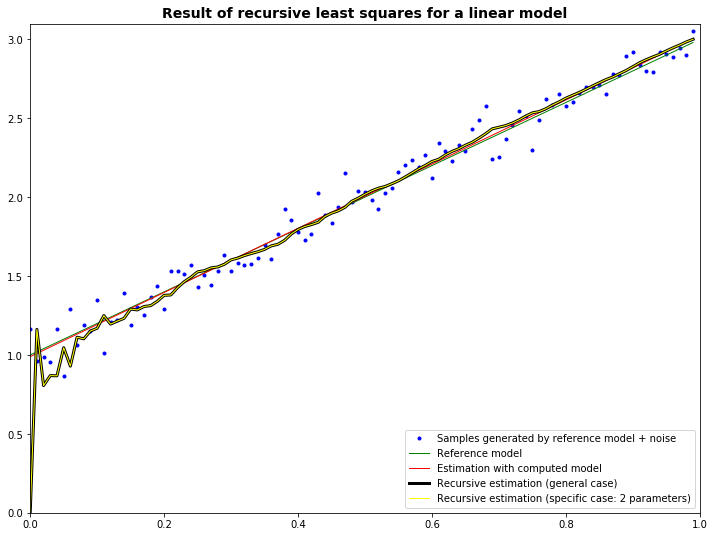

In [44]:
# Preparing the figure and the axes
plt.figure(figsize=(12, 9))
plt.title('Result of recursive least squares for a linear model', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.axis([0, 1, 0, (R[0][0] + R[1][0] + sigmaY) ])
plt.plot(X, Y, 'b.', label='Samples generated by reference model + noise')
plt.plot(X, np.matmul(A, R), 'g', label='Reference model', linewidth=1)
plt.plot(X, Z, 'r', label='Estimation with computed model', linewidth=1)
plt.plot(X, Zr, 'k', label='Recursive estimation (general case)', linewidth=3)
plt.plot(X, Zrs, color='yellow', label='Recursive estimation (specific case: 2 parameters)', linewidth=1)
plt.legend(loc='lower right')
plt.show()

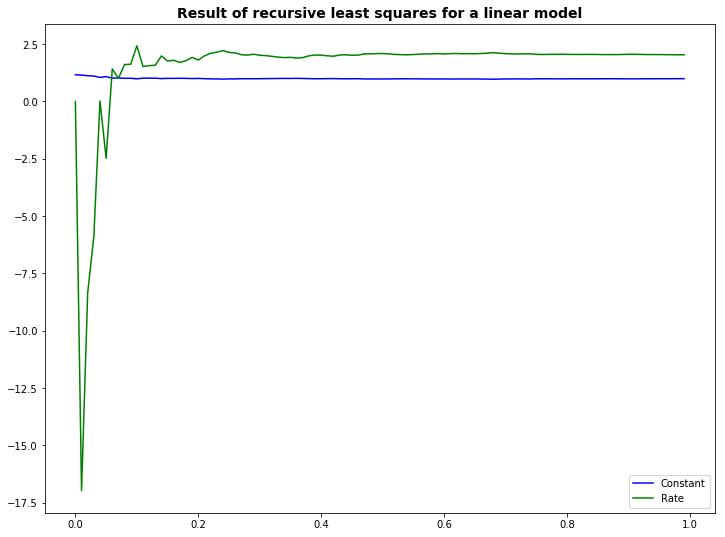

In [45]:
# Preparing the second figure for the recursive solutions
plt.figure(figsize=(12, 9))
plt.title('Result of recursive least squares for a linear model', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.plot(X, Sr[0,:], color='blue', label='Constant')
plt.plot(X, Sr[1,:], color='green', label='Rate')
plt.legend(loc='lower right')
plt.show()

In [49]:
# Printing the results of batch and recursive least squares
# Notes:
# - The solutions S, Sri and Sris must be really close
# - The solutions Sri, Sris and P, Ps must be strictly equal  
print("S\n", S)
print("Sr\n", Sri)
print("P\n", P)
print("Srs\n", Sris)
print("Ps\n", Ps)

S
 [[ 0.98951605]
 [ 2.03341865]]
Sr
 [[ 0.98951687]
 [ 2.0334168 ]]
P
 [[ 0.00394059 -0.00594058]
 [-0.00594058  0.01200118]]
Srs
 [[ 0.98951687]
 [ 2.0334168 ]]
Ps
 [[ 0.00394059 -0.00594058]
 [-0.00594058  0.01200118]]
